# EVAL Pt. 1

## a) 




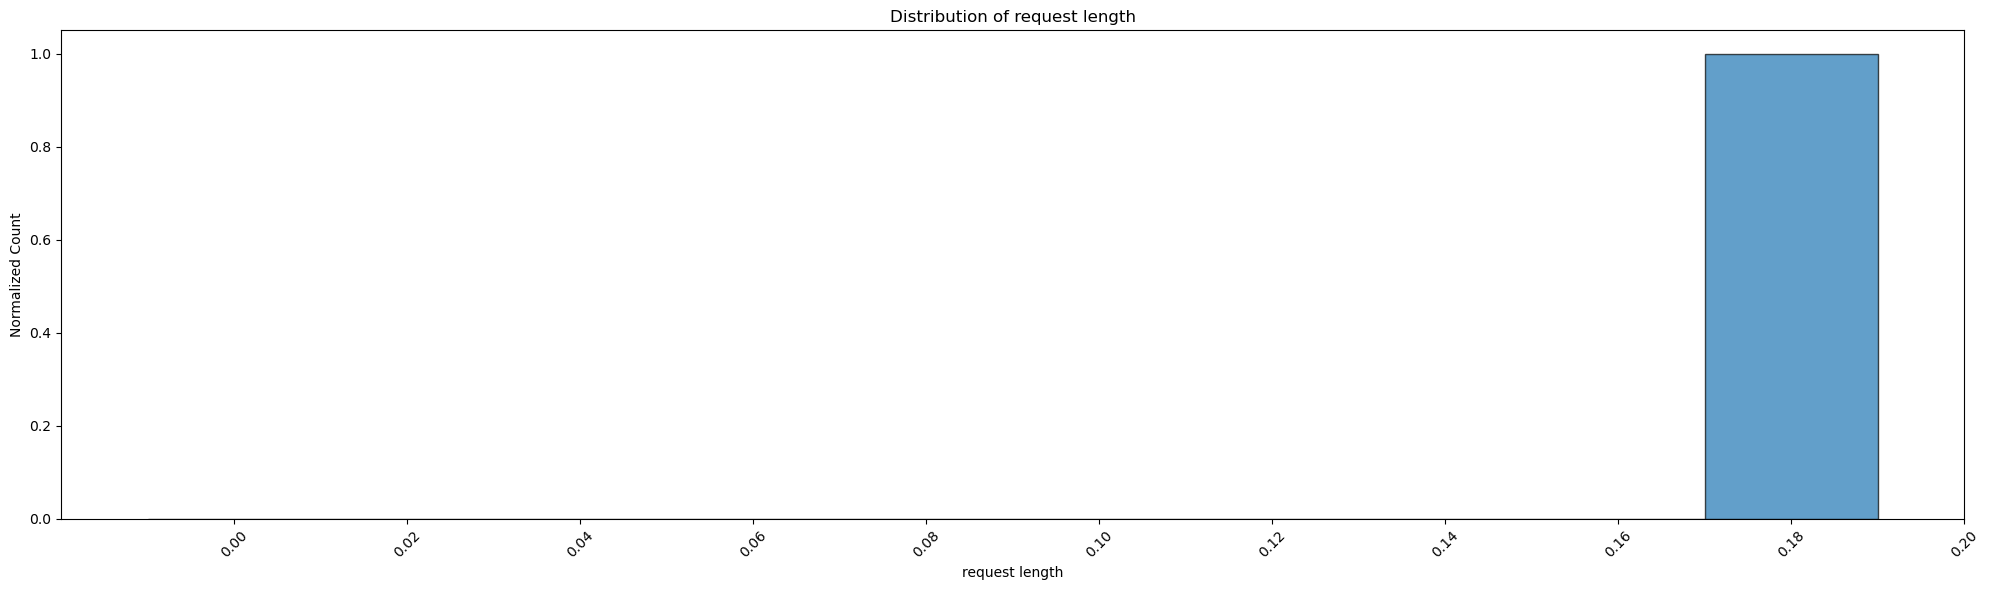

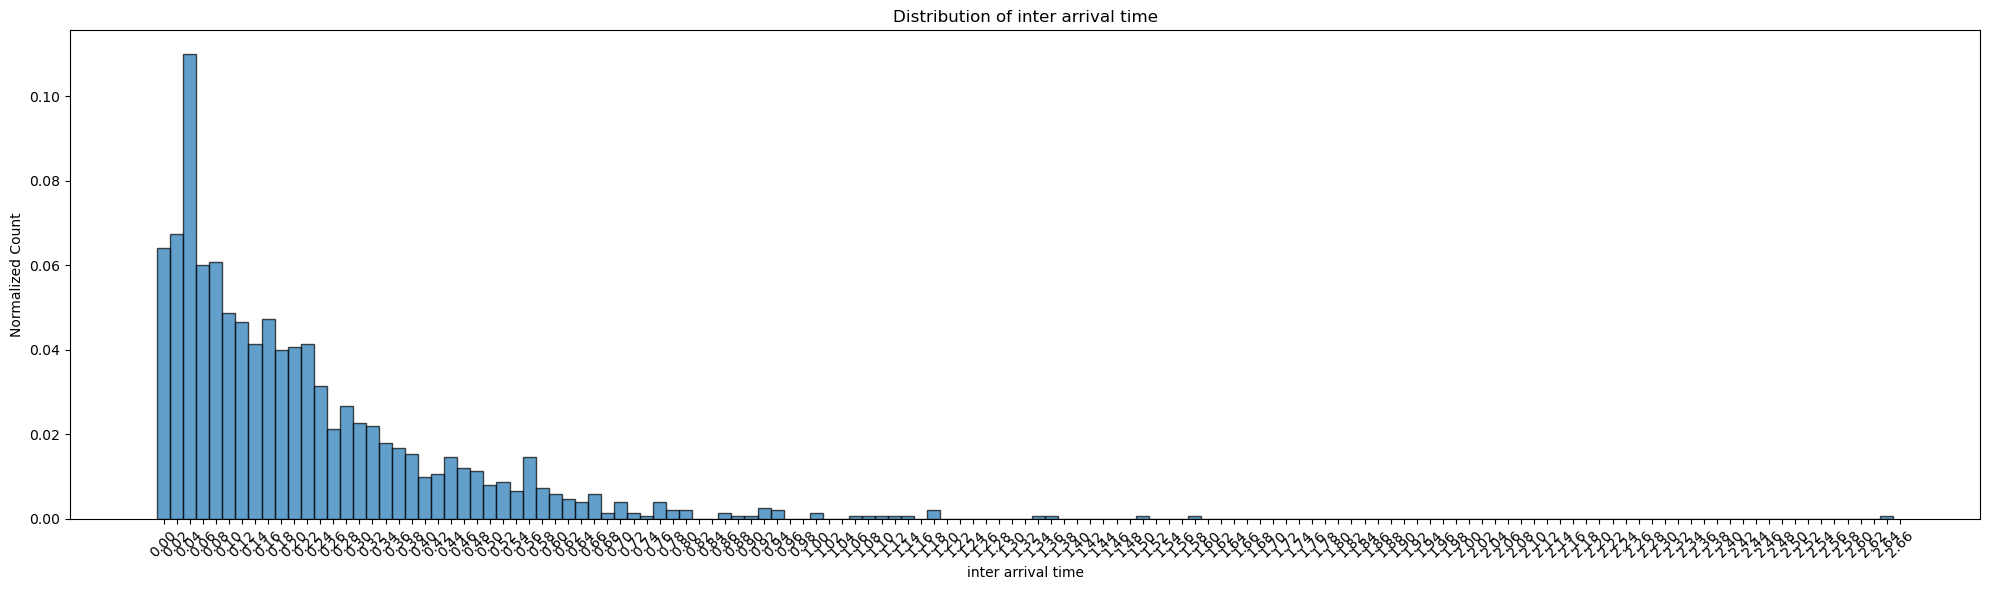

In [39]:
import matplotlib.pyplot as plt
import numpy as np

filename = "/Users/jialuli/Desktop/BU Fall 2023/CS 350/hw3/hw3_src/src/server_lim_out_1.txt"

req_lengths = []
timestamps = []
with open(filename, 'r') as file:
    for line in file:
        if line.strip().startswith('R'):
            columns = line.split(',')  
            if len(columns) > 1: 
                recv_timestamp = columns[2]
                req_len = columns[1]
                req_lengths.append(float(req_len))
                timestamps.append(float(recv_timestamp))

inter_arrival_times = [timestamps[i] - timestamps[i - 1] for i in range(1, len(timestamps))]           

def plot_data(data, label):
    # Define the bins
    bin_width = 0.02
    max_bin_value = max(data)
    bins = np.arange(0, max_bin_value + bin_width, bin_width)

    # Calculate the histogram
    counts, bin_edges = np.histogram(data, bins=bins)

    # Normalize the counts by the total number of requests
    normalized_counts = counts / len(data)

    # Plotting the histogram
    plt.figure(figsize=(20, 6))
    plt.bar(bin_edges[:-1], normalized_counts, width=bin_width, edgecolor='k', alpha=0.7)
    plt.title('Distribution of '+label)
    plt.xlabel(label)
    plt.ylabel('Normalized Count')
    plt.xticks(bins, rotation=45)
    plt.tight_layout()
    plt.show()

plot_data(req_lengths, "request length")
plot_data(inter_arrival_times, "inter arrival time")

In [60]:
print("Mean of request length: ", np.mean(req_lengths))
print("Mean of inter arrival time: ", np.mean(inter_arrival_times))
print("lambda of inter arrival time: ", 1/np.mean(inter_arrival_times))


Mean of request length:  0.20219557866666665
Mean of inter arrival time:  0.2194835110073382
lambda of inter arrival time:  4.556150917262145


As we can see, the request lengths is uniform distribution with a mean of 0.2. The inter arrival time follows an exponential distribution with mean of 0.219 and lambda of 4.556

## b)

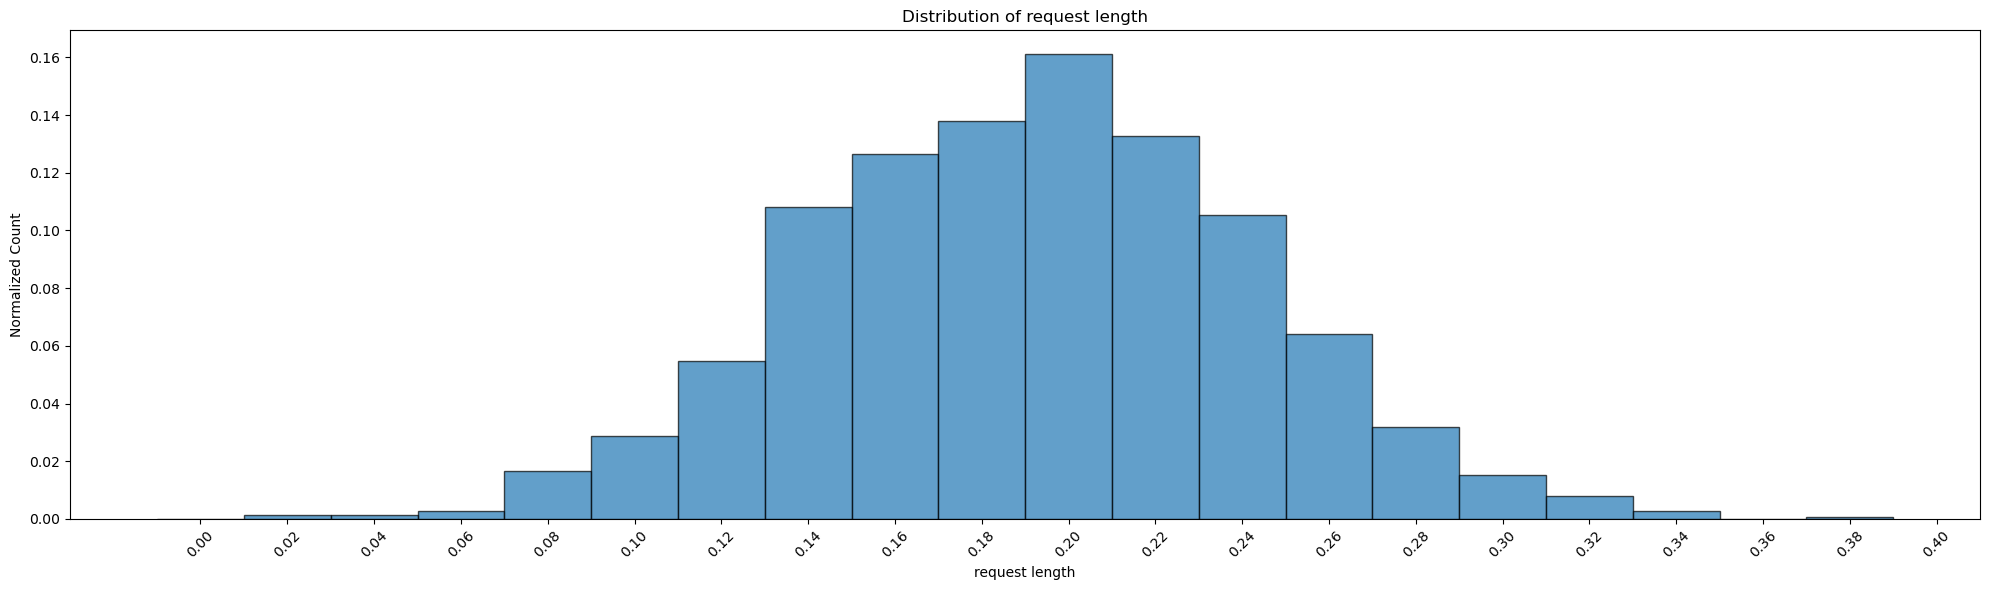

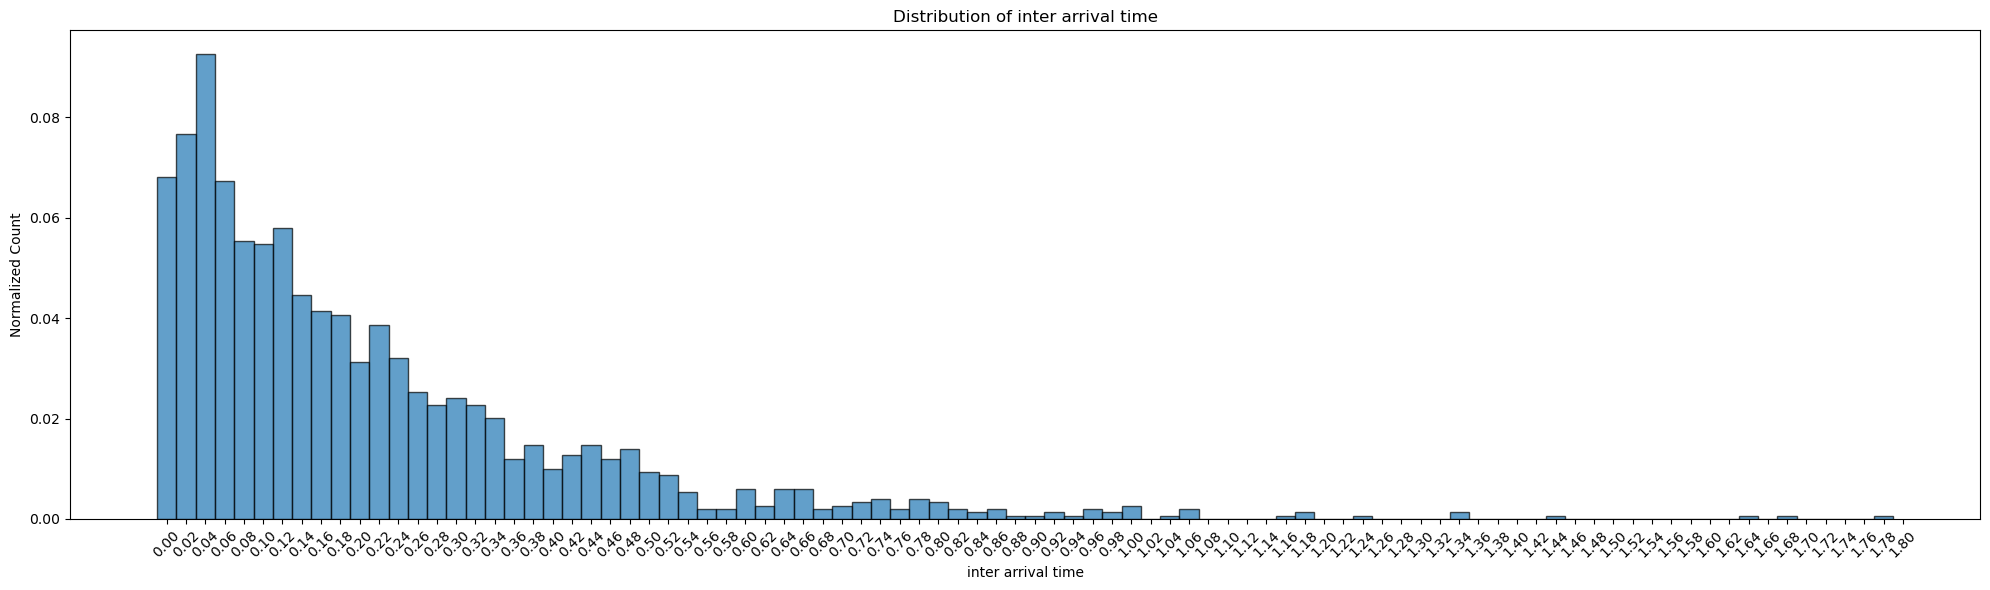

In [58]:
filename = "/Users/jialuli/Desktop/BU Fall 2023/CS 350/hw3/hw3_src/src/server_lim_out_2.txt"

req_lengths_2 = []
timestamps = []

with open(filename, 'r') as file:
    for line in file:
        if line.strip().startswith('R'):
            columns = line.split(',')  
            if len(columns) > 1: 
                recv_timestamp = columns[2]
                req_len = columns[1]
                req_lengths_2.append(float(req_len))
                timestamps.append(float(recv_timestamp))

inter_arrival_times_2 = [timestamps[i] - timestamps[i - 1] for i in range(1, len(timestamps))]   

plot_data(req_lengths_2, "request length")
plot_data(inter_arrival_times_2, "inter arrival time")

In [59]:
print("Mean of request length: ", np.mean(req_lengths_2))
print("Mean of inter arrival time: ", np.mean(inter_arrival_times_2))
print("Variance of request length: ", np.var(req_lengths_2))
print("lambda of inter arrival time: ", 1/np.mean(inter_arrival_times_2))

Mean of request length:  0.20219557866666665
Mean of inter arrival time:  0.2194835110073382
Variance of request length:  0.002541828118698478
lambda of inter arrival time:  4.556150917262145


As we can see, the request lengths(service time) follows a normal distribution with mean of 0.202 and variance of 0.0025. The inter arrival time follows an exponential distribution with mean of 0.219 and lambda 4.556

## c)

In [33]:
import os

response_times_0 = []
response_times_1 = []

def get_average_response(filename):
    total_response_time = 0.0
    
    with open(filename, 'r') as file:
        lines = file.readlines()
        count = 0
        for line in lines:
            line = line.strip()
            if line.startswith('R'):  
                parts = line.split(',')
                sent_timestamp = float(parts[0].split(':')[1])
                completion_timestamp = float(parts[4])
                # Calculate and accumulate the response time
                response_time = completion_timestamp - sent_timestamp
                total_response_time += response_time
                count += 1
    if count == 0:
        avg_response_time = 0
    else:
        avg_response_time = total_response_time / count
    
    return avg_response_time

for i in range(10, 20):  # for each experiment
    filename = f"/Users/jialuli/Desktop/BU Fall 2023/CS 350/hw3/hw3_src/src/server_lim_out_c/{i}.txt"
    if os.path.exists(filename):
        with open(filename, 'r') as file:
            avg_response_time = get_average_response(filename)
            response_times_0.append(avg_response_time)

for i in range(10, 20):  # for each experiment
    filename = f"/Users/jialuli/Desktop/BU Fall 2023/CS 350/hw3/hw3_src/src/server_lim_out_c1/{i}.txt"
    if os.path.exists(filename):
        with open(filename, 'r') as file:
            avg_response_time = get_average_response(filename)
            response_times_1.append(avg_response_time)


# Define the file path
file_path_0 = '/Users/jialuli/Desktop/BU Fall 2023/CS 350/hw3/hw3_src/src/server_lim_out_util_c.txt'
file_path_1 = '/Users/jialuli/Desktop/BU Fall 2023/CS 350/hw3/hw3_src/src/server_lim_out_util_c1.txt'

def process_utilization(file_path):
    with open(file_path, 'r') as file:
        # List to store the extracted percentages
        utilization = []
        # Read the file line by line
        for line in file:
            # If line contains "Percent of CPU this job got"
            if 'Percent of CPU this job got' in line:
                # Extract the percentage value
                percentage = float(line.split(':')[1].strip().rstrip("%"))/100
                # Append it to the list
                utilization.append(percentage)
    return utilization
            
# Print the extracted percentages
utilization_0 = process_utilization(file_path_0)
utilization_1 = process_utilization(file_path_1)
print(utilization_0)
print(utilization_1)
print(response_times_0)
print(response_times_1)

[0.49, 0.54, 0.59, 0.64, 0.68, 0.73, 0.78, 0.83, 0.88, 0.93]
[0.5, 0.55, 0.6, 0.66, 0.71, 0.76, 0.81, 0.86, 0.91, 0.95]
[0.09772285799998402, 0.1077470120000556, 0.1191347980001301, 0.1334027780002604, 0.15950660733349892, 0.19411256533312068, 0.2378834420000688, 0.2969308033332151, 0.40223397600020205, 0.6195229426666434]
[0.07536866600036349, 0.08089580400003858, 0.08717271400000512, 0.09474666000008194, 0.10464238399997702, 0.11785975933317483, 0.13823530999998912, 0.17877024066680072, 0.25037351399992863, 0.4732688066665238]


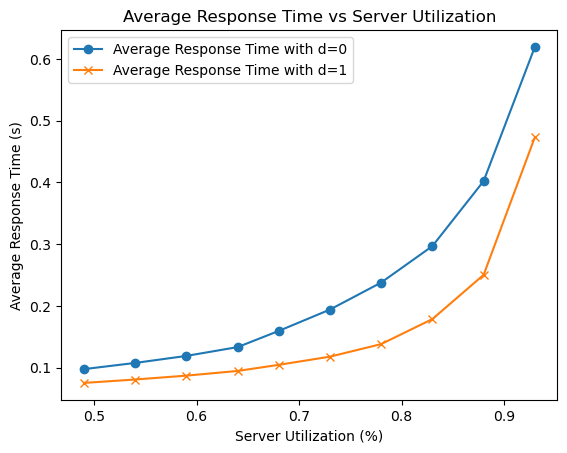

In [50]:
plt.plot(utilization_0, response_times_0, label='Average Response Time with d=0', marker='o')
plt.plot(utilization_0, response_times_1, label='Average Response Time with d=1', marker='x')

plt.xlabel('Server Utilization (%)')
plt.ylabel('Average Response Time (s)')
plt.title('Average Response Time vs Server Utilization')
plt.legend(loc='upper left')

plt.show()

For -d=1 (M/D/1), the average response time is lower than -d=0 (M/M/1) at the same server utilization. At the same avg response time, the utilization is lower. Thus the quality is better under -d=1 than d=0.

## d)

1500
Rejection Ratio: 3.53%


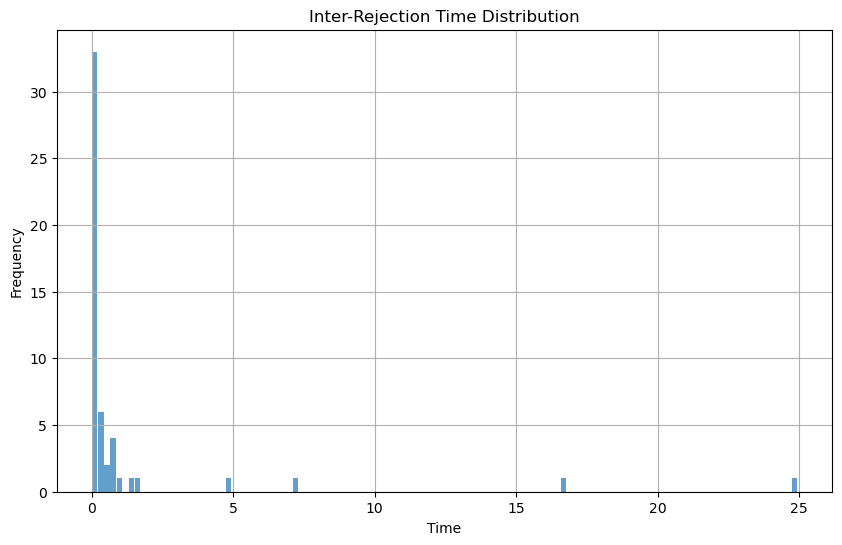

In [49]:
def process_server_output(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    requests = []
    rejections = []

    for line in lines:
        line_content = line.strip().split(':')
        if line_content[0].startswith('R'):  # this is a request
            requests.append(line_content[1])
        if line_content[0].startswith('X'):  # this is a rejection
            rejections.append(line_content[1])

    return requests, rejections


# Function to calculate rejection ratio
def calculate_rejection_ratio(requests, rejections):
    total_requests = len(requests)+len(rejections)
    print(total_requests)
    total_rejections = len(rejections)
    if total_requests > 0:
        return total_rejections / total_requests
    else:
        return 0

def plot_inter_rejection_times(rejections):
    rejection_times = []
    for rejection in rejections:
        reject_timestamp = rejection.split(',')[2]
        rejection_times.append(float(reject_timestamp))
    inter_rejection_times = [t - s for s, t in zip(rejection_times, rejection_times[1:])]

    plt.figure(figsize=(10, 6))
    plt.hist(inter_rejection_times, bins='auto', alpha=0.7, rwidth=0.85)
    plt.title('Inter-Rejection Time Distribution')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


file_path = '/Users/jialuli/Desktop/BU Fall 2023/CS 350/hw3/hw3_src/src/server_lim_out_4.txt'

requests, rejections = process_server_output(file_path)

rejection_ratio = calculate_rejection_ratio(requests, rejections)
print(f'Rejection Ratio: {rejection_ratio:.2%}')

plot_inter_rejection_times(rejections)

This distribution looks like exponential distribution

## e)

1500
Rejection Ratio: 0.93%


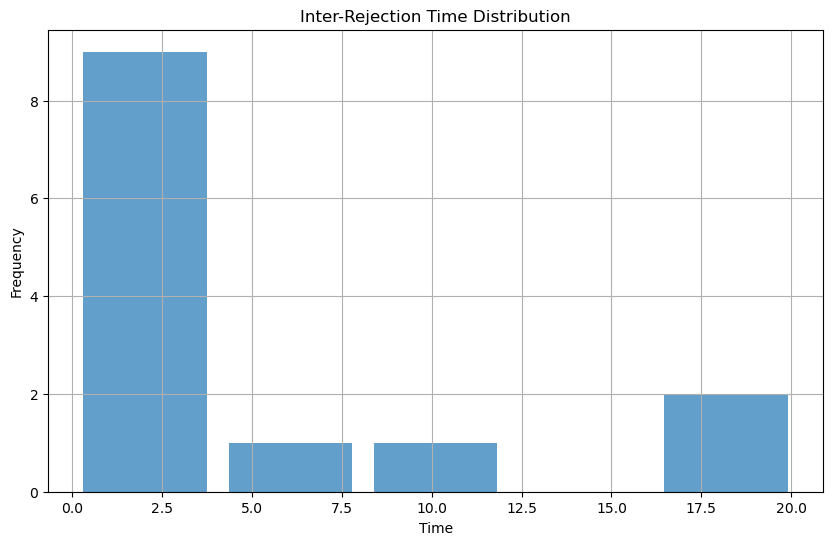

In [14]:
file_path = '/Users/jialuli/Desktop/BU Fall 2023/CS 350/hw3/hw3_src/src/server_lim_out_5.txt'

requests, rejections = process_server_output(file_path)

rejection_ratio = calculate_rejection_ratio(requests, rejections)
print(f'Rejection Ratio: {rejection_ratio:.2%}')

plot_inter_rejection_times(rejections)

The rejection rate is siginificantly lower and inter-rejection time is significantly higher. I guess if using -d=2 we could see lower rejection rate and higher inter-rejection time.